# Módulo 10 atividade 1

Uma instituição financeira quer conhecer melhor o perfil de renda de seus novos clientes para diversos fins, por exemplo, melhor dimensionar o limite de cartões de crédito dos novos clientes, sem necessariamente solicitar olerites ou documentações que impactem na experiência do seu cliente.

Para isto, conduziu um estudo com alguns clientes, comprovando suas rendas através de olerites e outros documentos, e pretende construir um modelo preditivo para esta renda com base em algumas variáveis que já possui em seu banco de dados.

As variáveis são intuitivas - note que há uma variável 'index' que é um identificador do cliente e que em geral o ```read_csv``` do pandas coloca também uma variável sequencial.

Estes dados estão no arquivo ```previsao_de_renda.csv```. Carregue-o em um *dataframe*.

1) Avalie a estrutura de correlação das variáveis quantitativas através de um gráfico de "matriz de dispersão" e através da avaliação gráfica da matriz de correlações. Veja se você identifica algum padrão interessante ou que te faça sentido.

In [8]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
data = pd.read_csv('Profissao- Cientista de Dados_M10_support material.csv')
data.head()

,Unnamed: 0,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
0,0,2015-01-01,8682,F,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,False,3369.24
1,1,2015-01-01,12830,M,True,True,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,False,6096.14
2,2,2015-01-01,2885,M,True,True,2,Assalariado,Superior completo,Casado,Casa,31,8.065753,4.0,False,5658.98
3,3,2015-01-01,16168,F,True,False,0,Empresário,Secundário,Casado,Casa,50,1.208219,2.0,False,7246.69
4,4,2015-01-01,12438,M,False,False,0,Assalariado,Secundário,Casado,Casa,52,13.873973,2.0,False,4017.37


In [22]:
#data.replace([np.inf, -np.inf], np.nan, inplace=True)
data.dropna(inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12466 entries, 0 to 14999
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             12466 non-null  int64  
 1   data_ref               12466 non-null  object 
 2   index                  12466 non-null  int64  
 3   sexo                   12466 non-null  object 
 4   posse_de_veiculo       12466 non-null  bool   
 5   posse_de_imovel        12466 non-null  bool   
 6   qtd_filhos             12466 non-null  int64  
 7   tipo_renda             12466 non-null  object 
 8   educacao               12466 non-null  object 
 9   estado_civil           12466 non-null  object 
 10  tipo_residencia        12466 non-null  object 
 11  idade                  12466 non-null  int64  
 12  tempo_emprego          12466 non-null  float64
 13  qt_pessoas_residencia  12466 non-null  float64
 14  mau                    12466 non-null  bool   
 15  renda  

C:\Users\USUÁRIO\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\USUÁRIO\anaconda3\Lib\site-packages\seaborn\_stats\counting.py:137: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
  bin_edges = np.histogram_bin_edges(vals, bins, binrange, weight)
C:\Users\USUÁRIO\anaconda3\Lib\site-packages\seaborn\_stats\counting.py:176: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
  hist, edges = np.histogram(vals, **bin_kws, weights=weights, density=density)
C:\Users\USUÁRIO\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_n

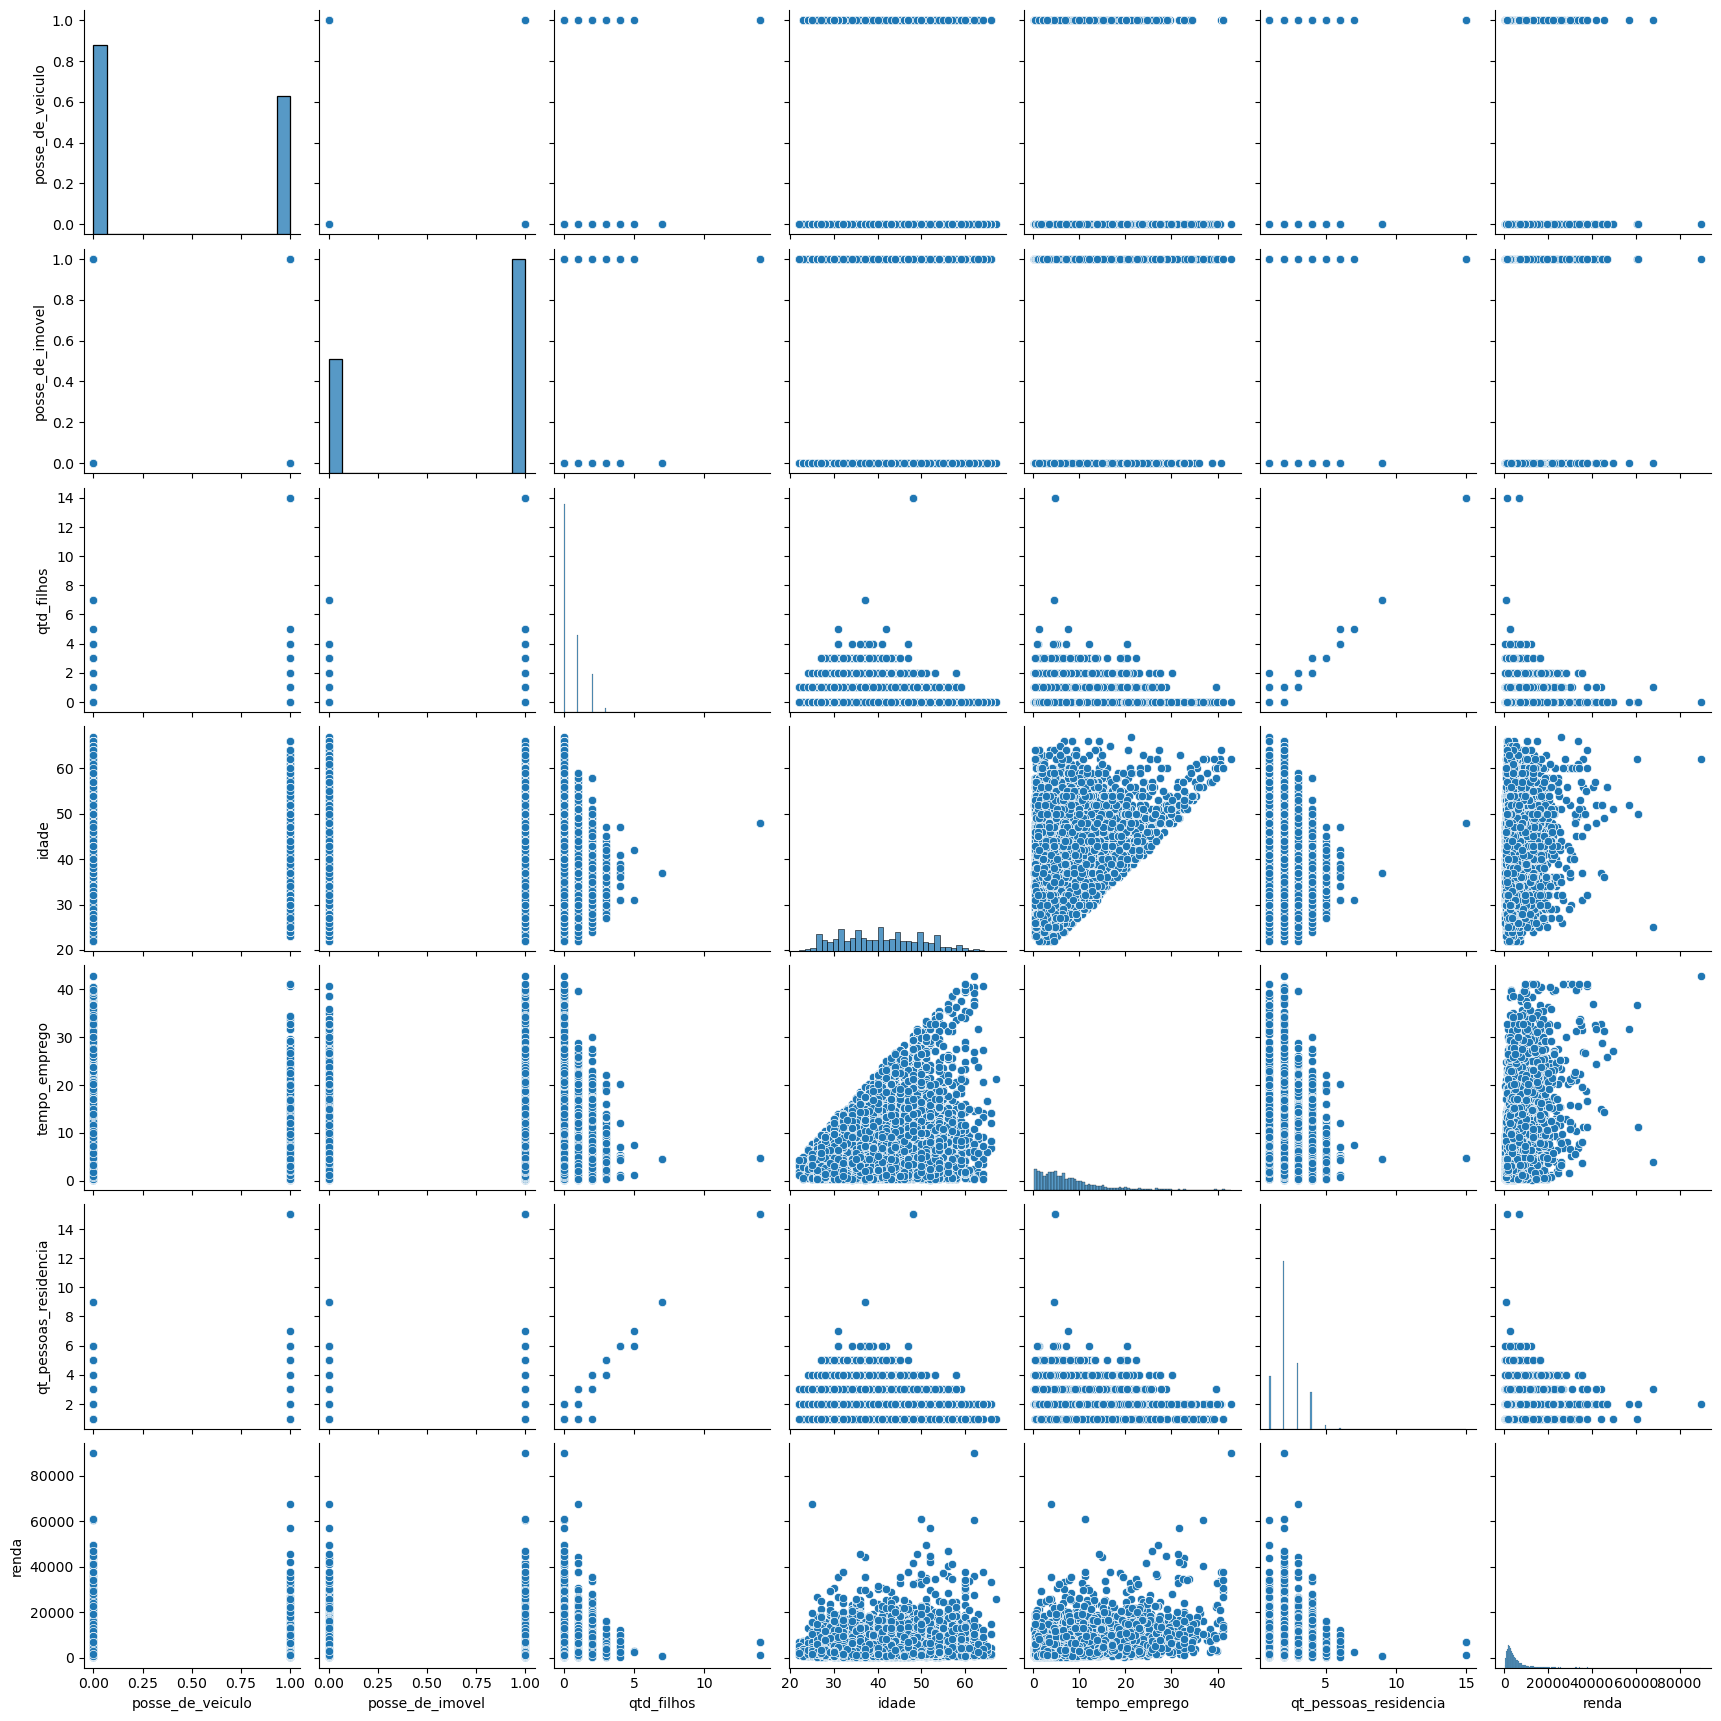

In [23]:
# Criando uma variável com as colunas a serem trabalhadas
dados_quant = data[['posse_de_veiculo', 'posse_de_imovel', 'qtd_filhos', 'idade','tempo_emprego', 'qt_pessoas_residencia','renda']]

# Criar a matriz de dispersão
sns.pairplot(dados_quant)
plt.show()

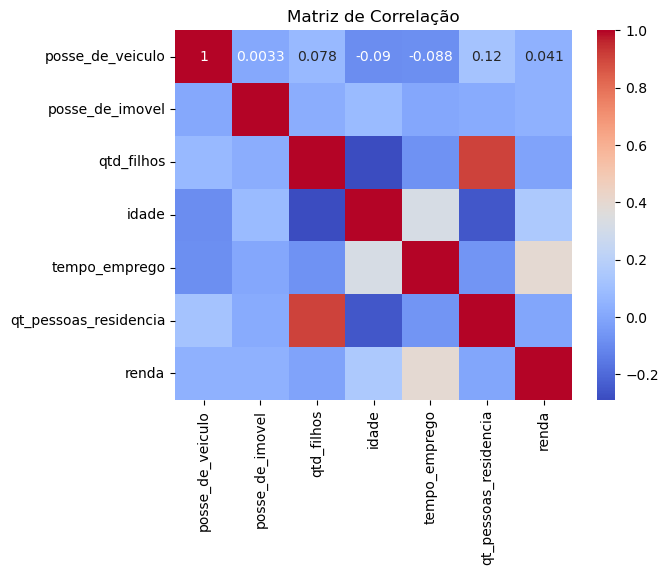

In [12]:
#matriz de correlação
matriz_correlacao = dados_quant.corr()
# Criar um heatmap para visualizar a matriz de correlação
sns.heatmap(matriz_correlacao, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlação')
plt.show()

Pode-se perceber um alto gráu de relação entre quantidade de filhos e quantidade de pessoas na família, o que já é de se eperar. Tem também uma relação positiva entre a renda e o tempo de emprego. Há também uma relação neutra entre idade e tempo de emprego.
Já as relações negativas são as mais presentes nessa análise, destacando-se a idade com quantidade de filhos e idade e quantidade de pessoas na família.

2) Avalie um gráfico de dispersão (*scatterplot*) específico para as duas variáveis mais correlacionadas com *renda*.

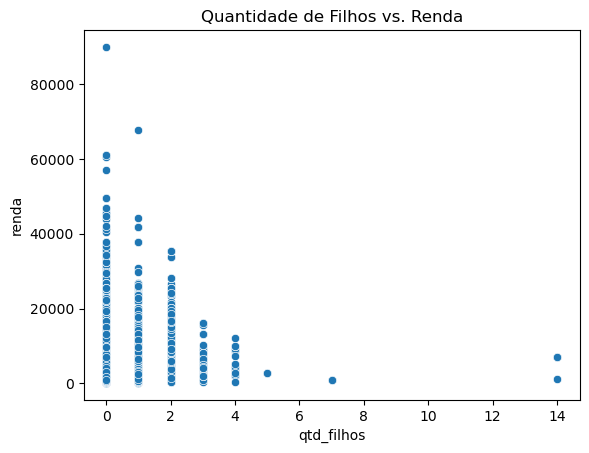

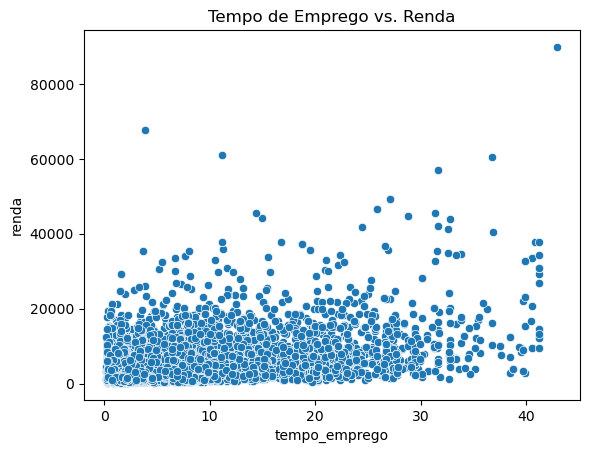

In [13]:
# Gráfico de dispersão: Quantidade de filhos x Renda
sns.scatterplot(data=dados_quant, x='qtd_filhos', y='renda')
plt.title('Quantidade de Filhos vs. Renda')
plt.show()

# Gráfico de dispersão: Tempo de emprego x Renda
sns.scatterplot(data=dados_quant, x='tempo_emprego', y='renda')
plt.title('Tempo de Emprego vs. Renda')
plt.show()

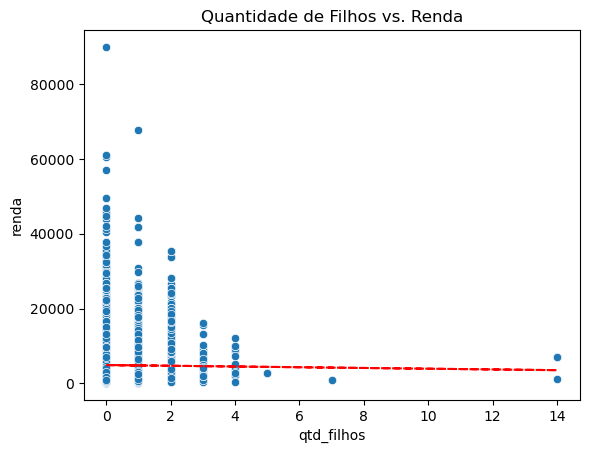

In [27]:
# Gráfico de dispersão: Quantidade de filhos x Renda com linha de tendência
sns.scatterplot(data=dados_quant, x='qtd_filhos', y='renda')

# Calculando a regressão linear e plotando a linha
z = np.polyfit(dados_quant['qtd_filhos'], dados_quant['renda'], 1)
p = np.poly1d(z)
plt.plot(dados_quant['qtd_filhos'], p(dados_quant['qtd_filhos']), "r--")

plt.title('Quantidade de Filhos vs. Renda')
plt.show()

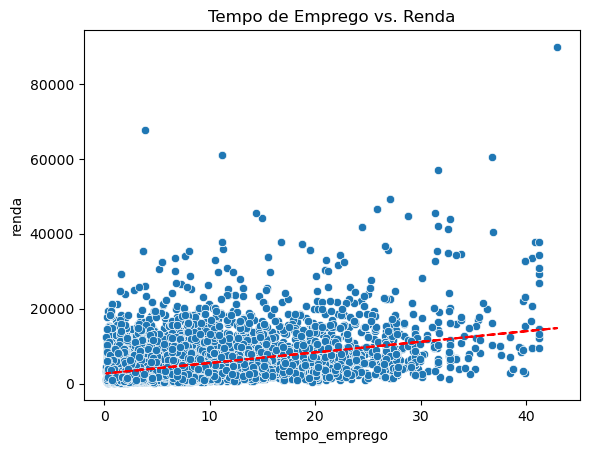

In [28]:
# Gráfico de dispersão: Tempo de emprego x Renda com linha de tendência
sns.scatterplot(data=dados_quant, x='tempo_emprego', y='renda')

# Calculando a regressão linear e plotando a linha
z = np.polyfit(dados_quant['tempo_emprego'], dados_quant['renda'], 1)
p = np.poly1d(z)
plt.plot(dados_quant['tempo_emprego'], p(dados_quant['tempo_emprego']), "r--")

plt.title('Tempo de Emprego vs. Renda')
plt.show()

No gráfico renda x quantidade de filho, percebe-se o aumento do número de filhos quanto menor é a renda da pessoa, já no gráfico entre tempo de emprego e renda, é perceptivel uma uniformidade entre as variáveis do gráfico, mas a medida que se aumenta o tempo de emprego, aumenta-se a renda do pesquisado.

3) Na su aopinião, há outliers na variável renda?

In [14]:
# Criando uma variável para o trabalho
renda = data['renda']
renda.sort_values()
print(renda.sort_values())

# dividindo a renda em grupos diferentes
div_renda = pd.cut(data['renda'], [159.9,20000,40000,60000,90000]).value_counts()
div_renda

9804       159.90
12416      187.69
14232      194.85
2723       238.38
6613       238.38
           ...   
7765     60475.59
9028     60965.51
7078     60965.51
113      67794.54
9934     89918.04
Name: renda, Length: 12466, dtype: float64


renda
(159.9, 20000.0]      12257
(20000.0, 40000.0]      186
(40000.0, 60000.0]       17
(60000.0, 90000.0]        5
Name: count, dtype: int64

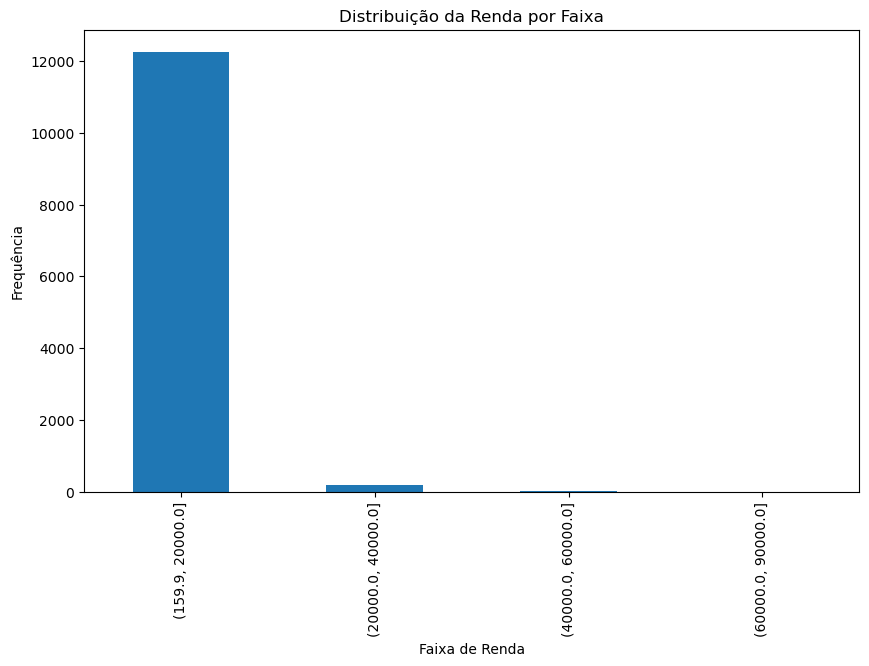

In [15]:
plt.figure(figsize=(10,6))
div_renda.plot(kind='bar')
plt.title('Distribuição da Renda por Faixa')
plt.xlabel('Faixa de Renda')
plt.ylabel('Frequência')
plt.show()

C:\Users\USUÁRIO\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


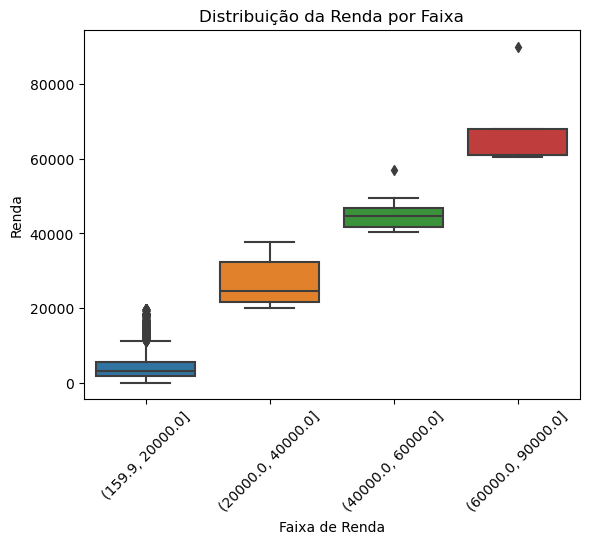

In [16]:
# Criar um DataFrame com as duas colunas (renda original e faixa de renda)
df_div_renda = pd.DataFrame({'renda': data['renda'], 'faixa_renda': pd.cut(data['renda'], [159.9,20000,40000,60000,90000])})

# Criar o boxplot
sns.boxplot(x='faixa_renda', y='renda', data=df_div_renda)
plt.title('Distribuição da Renda por Faixa')
plt.xlabel('Faixa de Renda')
plt.ylabel('Renda')
plt.xticks(rotation=45)
plt.show()

Pela resposta mostrada na análise, percebe-se uma alta concentração de informações nos valores de renda até 40000, acima desse valor o número de informações é tão pequeno, que ao meu ver, acabam se tornando outliers e distorcendo a análise geral da informação, puxando as informaçoes para valores maiores que o real. Inclusive dentro da faixa de até 20000 podemos perceber valores de outliers aparecendo no gráfico de boxplot.

4) Calcule o logaritmo da variável renda e repita a sequência de análise

In [17]:
#Calculando o log
data['log_renda'] = np.log(data['renda'])
log_renda = data['log_renda']
log_renda.sort_values()

9804      5.074549
12416     5.234792
14232     5.272230
2723      5.473866
6613      5.473866
           ...    
7765     11.009995
9028     11.018064
7078     11.018064
113      11.124237
9934     11.406654
Name: log_renda, Length: 12466, dtype: float64

In [18]:
# dividindo a renda em grupos diferentes
div_renda_log = pd.cut(data['log_renda'], [5.00,7.00,9.00,11.00,11.5]).value_counts()
div_renda_log

log_renda
(7.0, 9.0]      9786
(9.0, 11.0]     1775
(5.0, 7.0]       900
(11.0, 11.5]       5
Name: count, dtype: int64

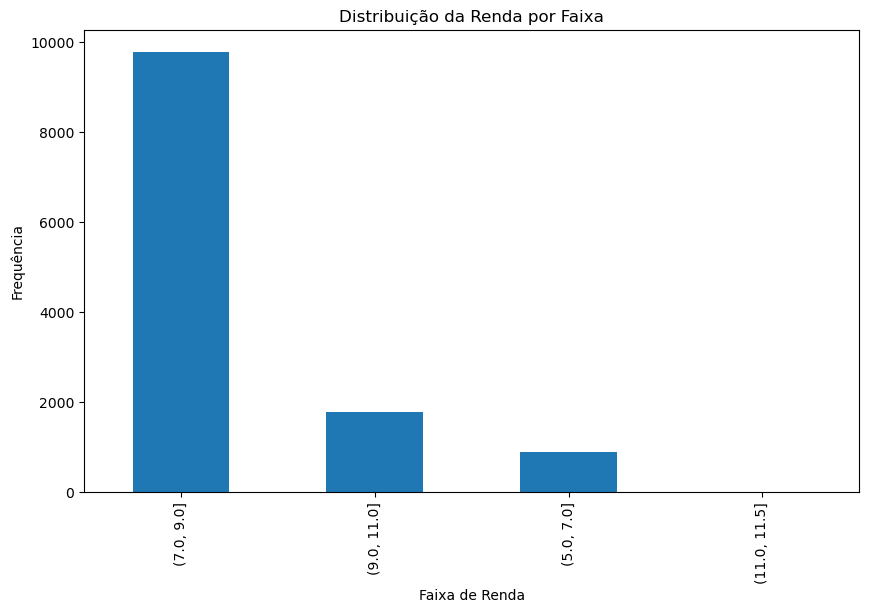

In [19]:
plt.figure(figsize=(10,6))
div_renda_log.plot(kind='bar')
plt.title('Distribuição da Renda por Faixa')
plt.xlabel('Faixa de Renda')
plt.ylabel('Frequência')
plt.show()

C:\Users\USUÁRIO\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


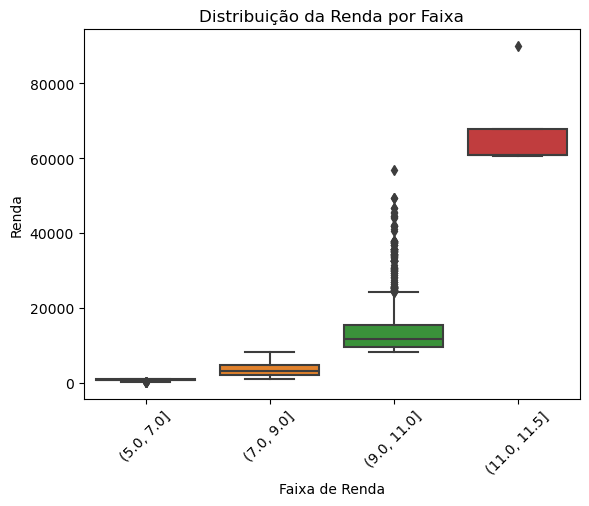

In [20]:
# Criar um DataFrame com as duas colunas (renda original e faixa de renda)
df_div_renda_log = pd.DataFrame({'renda': data['renda'], 'faixa_renda': pd.cut(data['log_renda'], [5.00,7.00,9.00,11.00,11.5])})

# Criar o boxplot
sns.boxplot(x='faixa_renda', y='renda', data=df_div_renda_log)
plt.title('Distribuição da Renda por Faixa')
plt.xlabel('Faixa de Renda')
plt.ylabel('Renda')
plt.xticks(rotation=45)
plt.show()

C:\Users\USUÁRIO\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\USUÁRIO\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


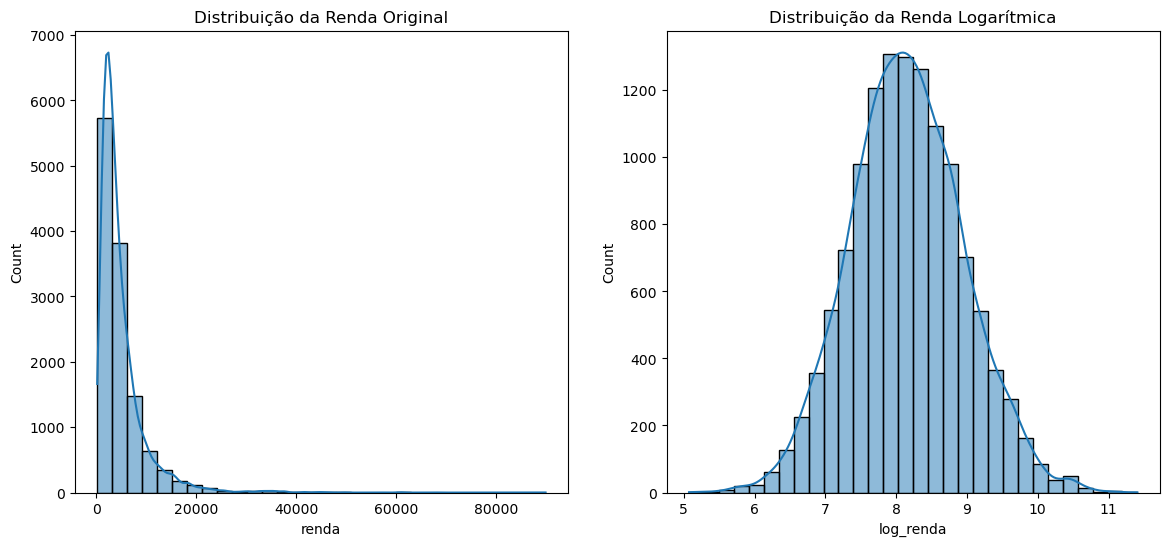

In [21]:
# Histogramas de renda antes e depois da transformação
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.histplot(data['renda'], bins=30, kde=True)
plt.title('Distribuição da Renda Original')

plt.subplot(1, 2, 2)
sns.histplot(data['log_renda'], bins=30, kde=True)
plt.title('Distribuição da Renda Logarítmica')

plt.show()

5) A aplicação do LOG você acha que melhorou ou piorou a análise?

Como a variável renda tem um faixa muito desproporcional entre seus elementos, acaba que utilizando o log, você